In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
data_path = r"C:\Users\marcu\Documents\machine_learning_projects\recipe_recommender\data\imdb\all_data\TMDb_updated.CSV"
df = pd.read_csv(data_path)

In [3]:
df.head()

,Unnamed: 0,title,overview,original_language,vote_count,vote_average
0,0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


(array([ 283.,  113.,  165.,  300., 1943., 2921., 2253., 1268.,  607.,
         147.]),
 array([ 0.        ,  1.01325734,  2.02651468,  3.03977202,  4.05302937,
         5.06628671,  6.07954405,  7.09280139,  8.10605873,  9.11931607,
        10.13257341]),
 <BarContainer object of 10 artists>)

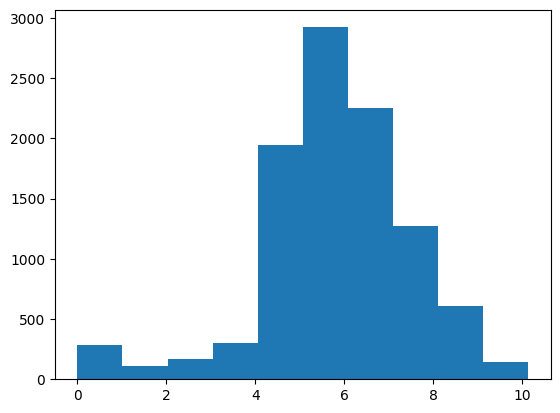

In [12]:
plt.hist(np.log(df["vote_count"]+1))

(array([2.430e+02, 3.000e+00, 1.400e+01, 6.500e+01, 4.550e+02, 2.131e+03,
        4.006e+03, 2.689e+03, 3.800e+02, 1.400e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

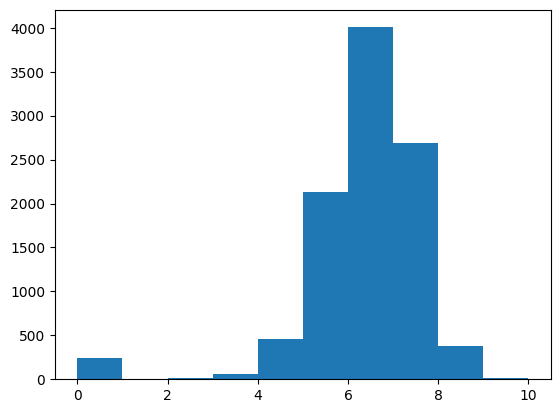

In [5]:
plt.hist(df["vote_average"])

In [6]:
def clean_text(text):
    #text = df["overview"].iloc[0]
    return re.sub(r'[^\w\s]', '', text)
text = df["overview"].str.replace(r'[^\w\s]', '',regex=True)
text = text[~text.isna()]
text = text[text.str.strip() != '']
#print(text)
# try:
#     df["overview"].apply(clean_text)
# except:
#     print(df["overview"].apply(clean_text))
# Output: Hello world Hows everything
vectorizer = TfidfVectorizer()
# documents = [i for i in text]
# print(documents)
# documents
tfidf_matrix = vectorizer.fit_transform(text.tolist())

In [7]:
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [8]:
text.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
      dtype='int64', length=9970)

In [9]:
def recommend(title, cosine_sim=cosine_sim, df=df):
    idx = df["title"] == title
    sim_scores = cosine_sim[idx][0]
    top_idx = np.argsort(sim_scores)[::-1]
    sim_scores = sim_scores[top_idx]
    # sort by similarity score, highest first
    # skip itself (the first entry)
    top_idx = top_idx[1:6]
    # return the recommended titles
    #print(df['title'].iloc[top_idx])
    return df['title'].iloc[top_idx]



In [ ]:
updated_df = df.loc[text.index]
randomly_selected_title = updated_df["title"].sample().iloc[0]
print(f"Recommended from {randomly_selected_title}")
recommendations = recommend(randomly_selected_title,cosine_sim,updated_df)
recommendations

Recommended from Kronk's New Groove


6846                  Little Boy
5786                The Haunting
8758                Fathers' Day
387                  Ratatouille
1680    Honey, I Shrunk the Kids
Name: title, dtype: object

: 